# Random Forest

In [1]:
import os 
import numpy as np 
import pandas as pd
import seaborn as sns


from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from itertools import product
from matplotlib import style

In [2]:
#Loading dataset
df = pd.read_csv('ufc.csv')

In [3]:
#Display first 5 rows
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Derrick Lewis,Ciryl Gane,250,-320,250.000000,31.250000,07/08/2021,"Houston, Texas, USA",USA,Blue,...,Punches,3.0,04:11,851.0,1400.0,215.0,2200.0,600.0,330.0,120.0
1,Jose Aldo,Pedro Munhoz,-105,-115,95.238095,86.956522,07/08/2021,"Houston, Texas, USA",USA,Red,...,NaN,3.0,05:00,900.0,150.0,225.0,1600.0,900.0,450.0,450.0
2,Michael Chiesa,Vicente Luque,-115,-105,86.956522,95.238095,07/08/2021,"Houston, Texas, USA",USA,Blue,...,D'Arce Choke,1.0,03:25,205.0,225.0,300.0,350.0,650.0,900.0,300.0
3,Tecia Torres,Angela Hill,-160,140,62.500000,140.000000,07/08/2021,"Houston, Texas, USA",USA,Red,...,NaN,3.0,05:00,900.0,-105.0,180.0,1000.0,2000.0,1100.0,750.0
4,Song Yadong,Casey Kenney,105,-125,105.000000,80.000000,07/08/2021,"Houston, Texas, USA",USA,Red,...,NaN,3.0,05:00,900.0,215.0,165.0,1100.0,800.0,350.0,700.0


In [4]:
#Number of rows and columns
df.shape

(498, 119)

In [5]:
#Shows the number of unique values in each column
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature R_fighter :374
The number of values for feature B_fighter :389
The number of values for feature R_odds :168
The number of values for feature B_odds :170
The number of values for feature R_ev :171
The number of values for feature B_ev :176
The number of values for feature date :46
The number of values for feature location :5 -- ['Abu Dhabi, Abu Dhabi, United Arab Emirates' 'Glendale, Arizona, USA'
 'Houston, Texas, USA' 'Jacksonville, Florida, USA'
 'Las Vegas, Nevada, USA']
The number of values for feature country :2 -- ['USA' 'United Arab Emirates']
The number of values for feature Winner :2 -- ['Blue' 'Red']
The number of values for feature title_bout :2 -- [False  True]
The number of values for feature weight_class :13
The number of values for feature gender :2 -- ['FEMALE' 'MALE']
The number of values for feature no_of_rounds :2 -- [3 5]
The number of values for feature B_current_lose_streak :5 -- [0 1 2 3 4]
The number of values for feature B_curre

TypeError: '<' not supported between instances of 'float' and 'str'

In [6]:
#Checking number of null values
df.isnull().sum()

R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    7
r_sub_odds    8
b_sub_odds    7
r_ko_odds     8
b_ko_odds     7
Length: 119, dtype: int64

In [7]:
#Replacing null values with 0
df.fillna(0, inplace=True)

In [8]:
#Total null values after being replaced
df.isnull().sum()

R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    0
r_sub_odds    0
b_sub_odds    0
r_ko_odds     0
b_ko_odds     0
Length: 119, dtype: int64

In [9]:
#Categorical features
cat_features = ['R_fighter','B_fighter', 'date', 'location','country', 'title_bout', 'weight_class' ,
                'gender', 'B_Stance', 'R_Stance', 'better_rank', 'finish_round_time' ,'finish_details', 'finish']

In [10]:
#One-hot encoding
new_df = pd.get_dummies(df, columns = cat_features)
print(df.shape)
print(new_df.shape)

new_df['Winner'][new_df['Winner'] == 'Blue'] = 1
new_df['Winner'][new_df['Winner'] == 'Red'] = 0

new_df

(498, 119)
(498, 1021)


<ipython-input-10-925b51707fed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Winner'][new_df['Winner'] == 'Blue'] = 1
<ipython-input-10-925b51707fed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Winner'][new_df['Winner'] == 'Red'] = 0


,R_odds,B_odds,R_ev,B_ev,Winner,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,...,finish_details_Punch,finish_details_Punches,finish_details_Rear Naked Choke,finish_0,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_S-DEC,finish_SUB,finish_U-DEC
0,250,-320,250.000000,31.250000,1,5,0,6,0,5.37,...,0,1,0,0,0,1,0,0,0,0
1,-105,-115,95.238095,86.956522,0,3,0,1,0,5.55,...,0,0,0,0,0,0,0,0,0,1
2,-115,-105,86.956522,95.238095,1,3,0,3,0,5.65,...,0,0,0,0,0,0,0,0,1,0
3,-160,140,62.500000,140.000000,0,3,0,1,0,5.71,...,0,0,0,0,0,0,0,0,0,1
4,105,-125,105.000000,80.000000,0,3,1,0,0,4.85,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,188,-240,188.000000,41.666667,1,3,0,4,0,4.01,...,0,0,0,0,0,0,0,0,0,1
494,100,-124,100.000000,80.645161,1,3,0,1,0,3.29,...,0,0,0,0,0,0,0,0,0,1
495,130,-162,130.000000,61.728395,1,3,1,0,0,1.79,...,0,0,0,0,0,0,0,0,0,1
496,240,-315,240.000000,31.746032,1,3,0,1,0,1.13,...,0,0,0,0,0,0,0,0,1,0


In [11]:
#Setting X and Y values
X = new_df.drop('Winner', axis=1).values
y = new_df['Winner']


y = y.astype(int)



print(X.shape)
print(y.shape)

(498, 1020)
(498,)


In [12]:
#DecisionTree used to identify most significant/important features
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion ='entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [13]:
#Running Feature Importance

#Creating new dataframe to organise the values
fi_col = []
fi = []

for i,column in enumerate(new_df.drop('Winner', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for R_odds is : 0.08679974388485366
The feature importance for B_odds is : 0.0
The feature importance for R_ev is : 0.0
The feature importance for B_ev is : 0.04168646709034943
The feature importance for no_of_rounds is : 0.0
The feature importance for B_current_lose_streak is : 0.0
The feature importance for B_current_win_streak is : 0.009925633253983487
The feature importance for B_draw is : 0.0
The feature importance for B_avg_SIG_STR_landed is : 0.025644469356890385
The feature importance for B_avg_SIG_STR_pct is : 0.03307484263696598
The feature importance for B_avg_SUB_ATT is : 0.0
The feature importance for B_avg_TD_landed is : 0.02065024943423774
The feature importance for B_avg_TD_pct is : 0.0
The feature importance for B_longest_win_streak is : 0.0
The feature importance for B_losses is : 0.0
The feature importance for B_total_rounds_fought is : 0.01441167125145936
The feature importance for B_total_title_bouts is : 0.0
The feature importance for B_win_

The feature importance for B_fighter_Michael Trizano is : 0.0
The feature importance for B_fighter_Michal Oleksiejczuk is : 0.0
The feature importance for B_fighter_Michel Pereira is : 0.0
The feature importance for B_fighter_Michel Prazeres is : 0.0
The feature importance for B_fighter_Michelle Waterson is : 0.0
The feature importance for B_fighter_Miesha Tate is : 0.0
The feature importance for B_fighter_Miguel Baeza is : 0.0
The feature importance for B_fighter_Mike Grundy is : 0.0
The feature importance for B_fighter_Mike Rodriguez is : 0.0
The feature importance for B_fighter_Miranda Granger is : 0.0
The feature importance for B_fighter_Miranda Maverick is : 0.0
The feature importance for B_fighter_Mizuki Inoue is : 0.0
The feature importance for B_fighter_Modestas Bukauskas is : 0.0
The feature importance for B_fighter_Montana De La Rosa is : 0.0
The feature importance for B_fighter_Montserrat Conejo is : 0.0
The feature importance for B_fighter_Mounir Lazzez is : 0.0
The feature

In [14]:
#Creating the fi_df dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance'])
fi_df


#Ordering the data
fi_sorted = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

#Viewing which columns have importance
fi_sorted.head(35)


,index,Feature,Feature Importance
0,0,R_odds,0.086800
1,99,b_dec_odds,0.063726
2,33,R_avg_TD_landed,0.060851
3,23,B_wins,0.054805
4,53,longest_win_streak_dif,0.054044
5,30,R_avg_SIG_STR_landed,0.043609
6,3,B_ev,0.041686
7,58,ko_dif,0.033795
8,9,B_avg_SIG_STR_pct,0.033075
9,57,total_title_bout_dif,0.032160


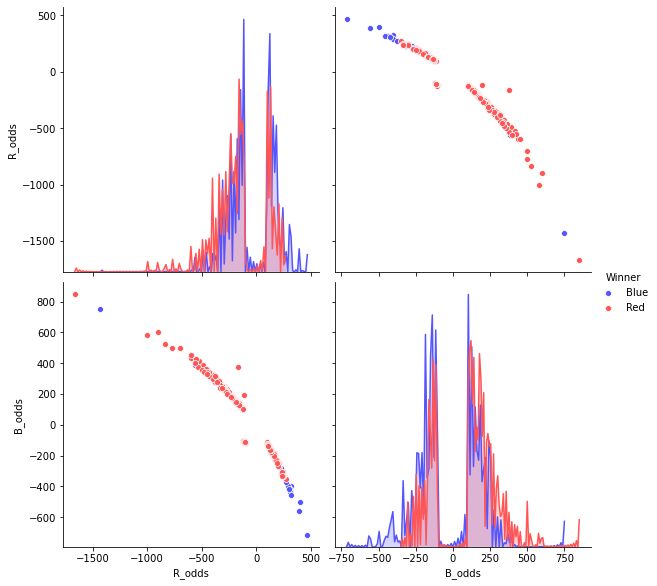

In [15]:
# Limiting the data
df2 = df[['R_odds', 'B_odds', 'Winner'] ]



# Visualize the data using seaborn Pairplots
g = sns.pairplot(df2, hue = 'Winner', palette = 'seismic' , diag_kws={'bw': 0.2}, height = 4)

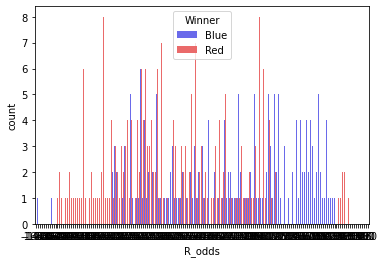

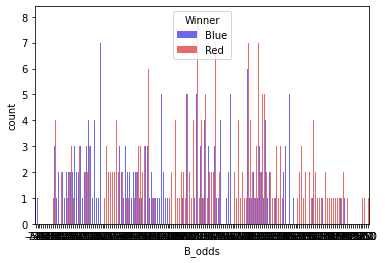

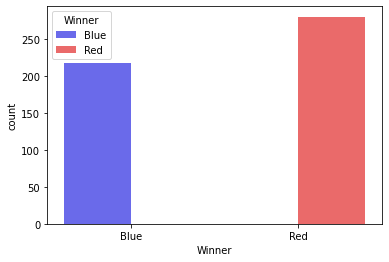

In [16]:
# Investigate all the features by our y

features = ['R_odds', 'B_odds', 'Winner']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=df2, hue = 'Winner', palette="seismic")

In [20]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [21]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion ='entropy', max_depth = 5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=15)

In [22]:
#Accuracy on Train data
print("Training dataset accuracy is:", dt.score(X_train, y_train))

#Accuracy on Test data
print("Testing dataset accuracy is:", dt.score(X_test, y_test))

Training dataset accuracy is: 0.7989276139410187
Testing dataset accuracy is: 0.52


In [23]:
#Confusion Matrix Function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes,cmap='GnBu', yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

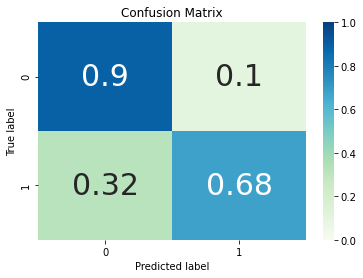

In [24]:
y_pred = dt.predict(X_train)   #Predicts y

#Visualising Confusion Matrix

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = dt.classes_, title = "Confusion Matrix")

In [25]:
#Calculating False Positive(FP), False Negative(FN), True Positive(TP) and True Negative(TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum()- (FP + FN + TP)

#Sensitivity, hit rate, recall or True positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is: ", TPR)

#Precision or Positive predictive value
PPV = TP / (TP+ FP)
print("The Precision is: ", PPV)

#False positive rate
FPR = FP / (FP + TN)
print("The False Positive rate is: ", FPR)

#False Negative rate
FNR = FN / (FN + TP)
print("The False Negative rate is: ", FNR)

#Averages:
print("")
print("The average TPR is: ", TPR.sum()/2)
print("The average Precision rate is: " , PPV.sum()/2)
print("The False Positive rate is: " , FPR.sum()/2)
print("The False Negative rate is: " , FNR.sum()/2)

The True Positive Rate is:  [0.89705882 0.68047337]
The Precision is:  [0.7721519  0.84558824]
The False Positive rate is:  [0.31952663 0.10294118]
The False Negative rate is:  [0.10294118 0.31952663]

The average TPR is:  0.7887660981552385
The average Precision rate is:  0.8088700670141474
The False Positive rate is:  0.2112339018447616
The False Negative rate is:  0.2112339018447616


Training Accuracy is:  1.0
Testing Accuracy is:  0.64


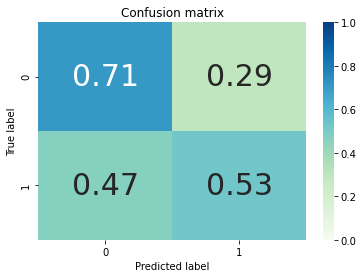

In [27]:
#RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)


# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.584
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.608
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.608
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.608
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.608
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.648
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.672
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.664
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.648
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.672
Classification accuracy on test set with max features = log2 and max_depth = None: 0.632
Classification accuracy on test set with max features = log2

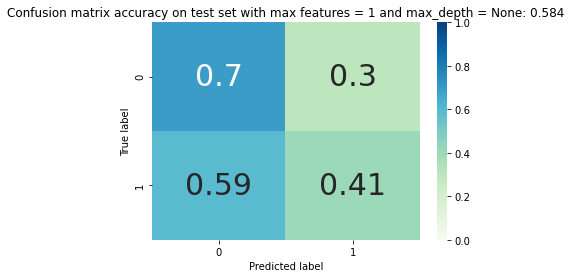

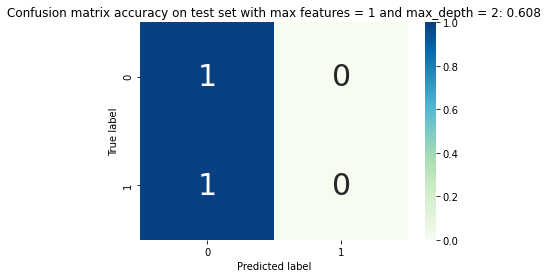

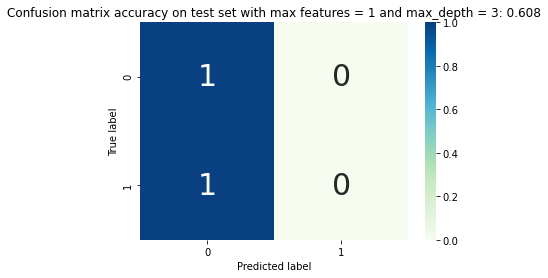

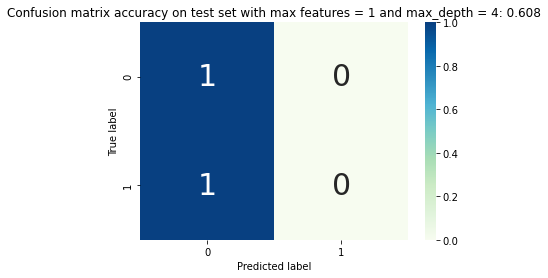

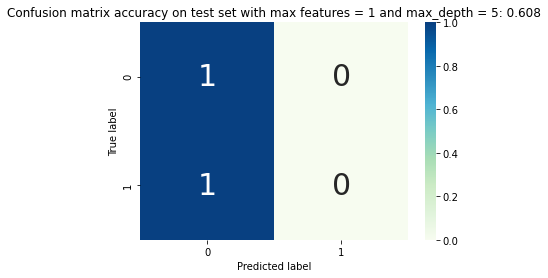

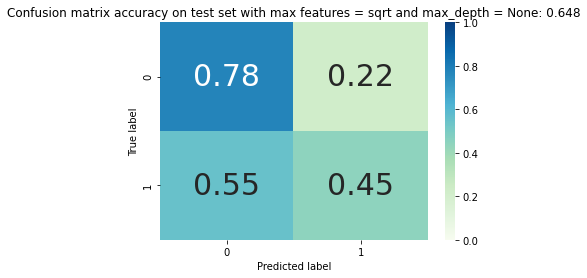

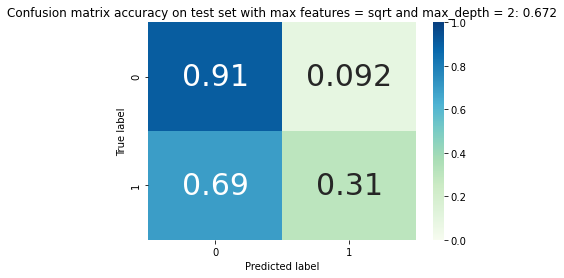

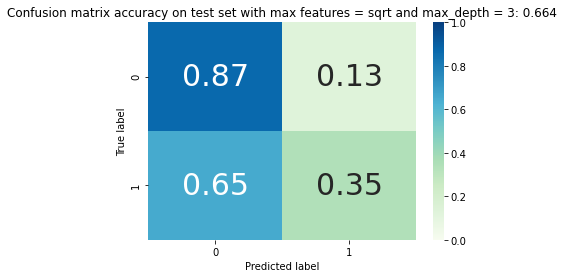

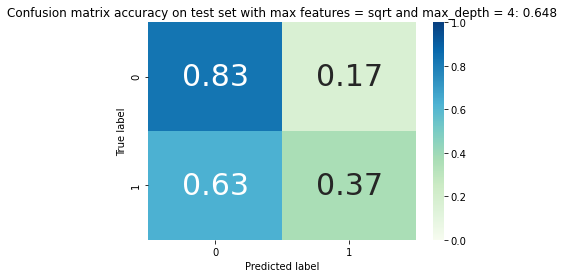

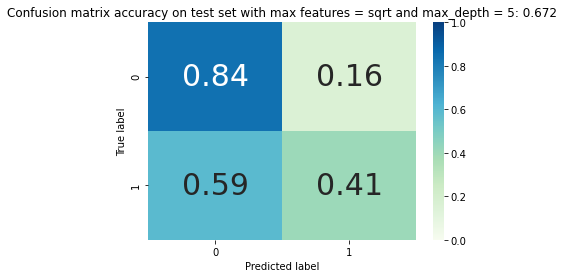

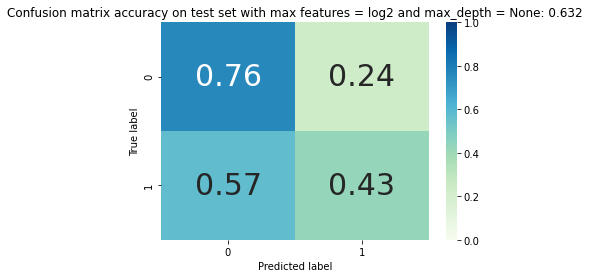

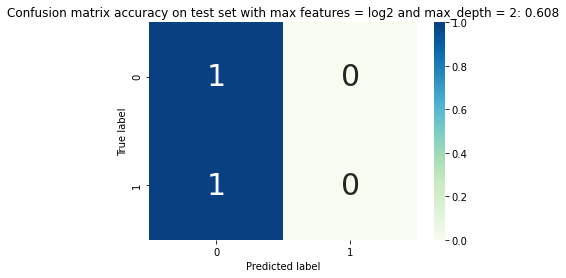

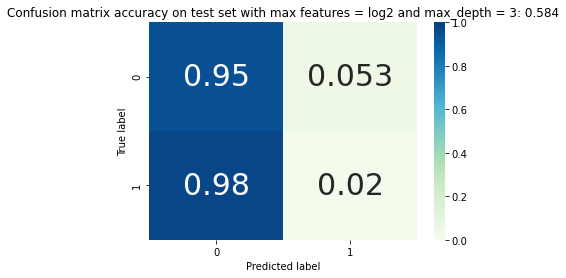

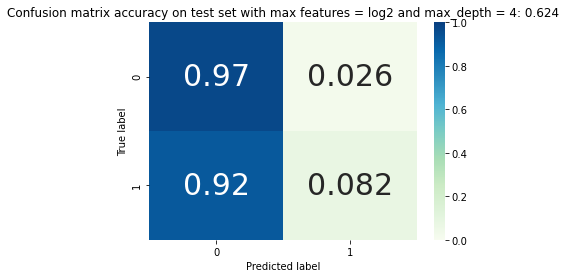

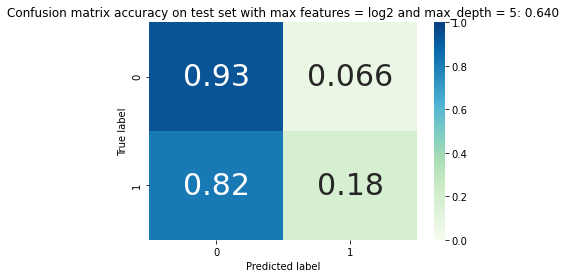

In [28]:
#Tuning Random Forest Parameters

n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths):      #iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1000)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

Training Accuracy is:  1.0
Testing Accuracy is:  0.664


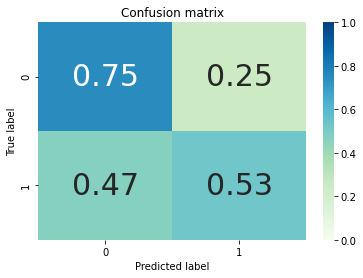

In [33]:
#Confusion Matrix of RandomTree with best parameters

#max features = 'sqrt' and max_depth = None
    
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt', max_depth = None)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)


# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)
    
    

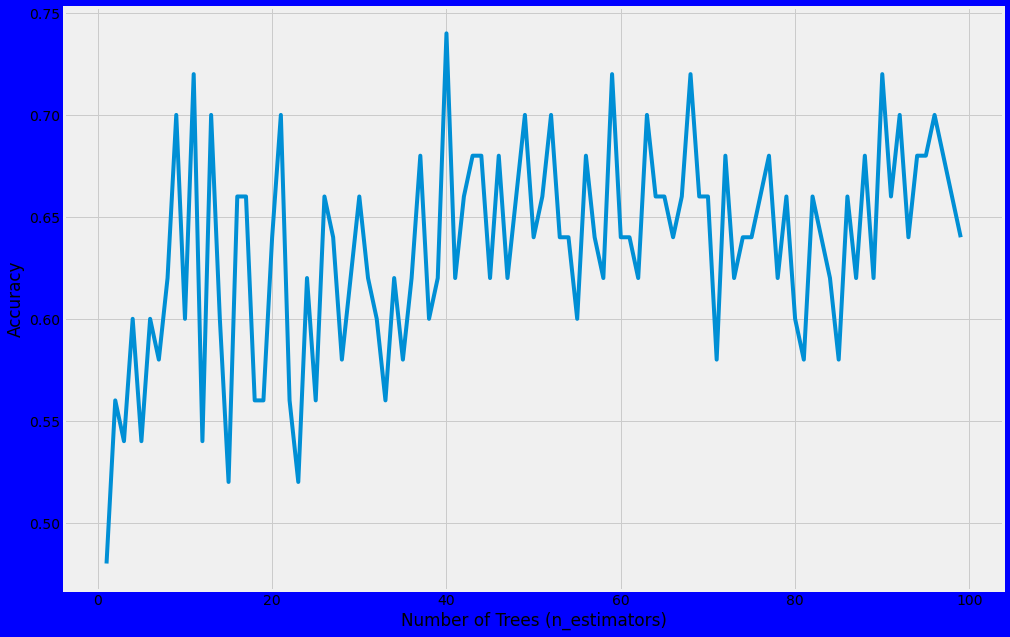

In [100]:
#Plotting a graph to see accuracy of estimators over a range
#Plotted using the optimal parameters from above

style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10), facecolor= 'blue')

#investigates the accuracy over a range of estimators plotting the result
#THIS TAKES A WHILE TO RUN!!
accuracy_data = []
nums = []
for i in range(1,100):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy",max_features='sqrt', max_depth = None)
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
#print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

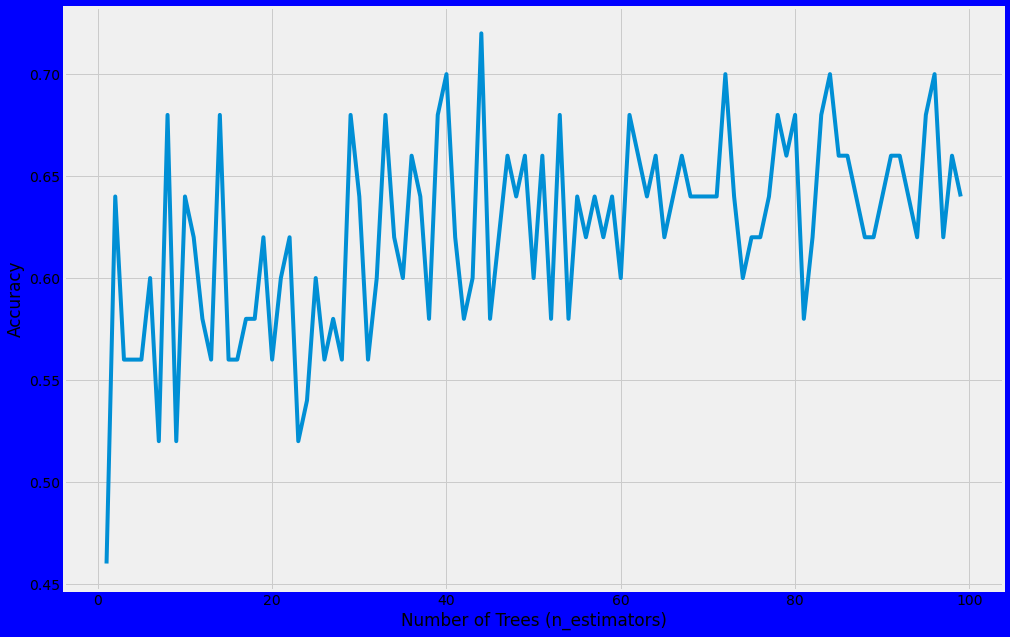

In [99]:
#Graph plotted without optimal parameters

style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10), facecolor= 'blue')

#investigates the accuracy over a range of estimators plotting the result
#THIS TAKES A WHILE TO RUN!!
accuracy_data = []
nums = []
for i in range(1,100):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
#print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

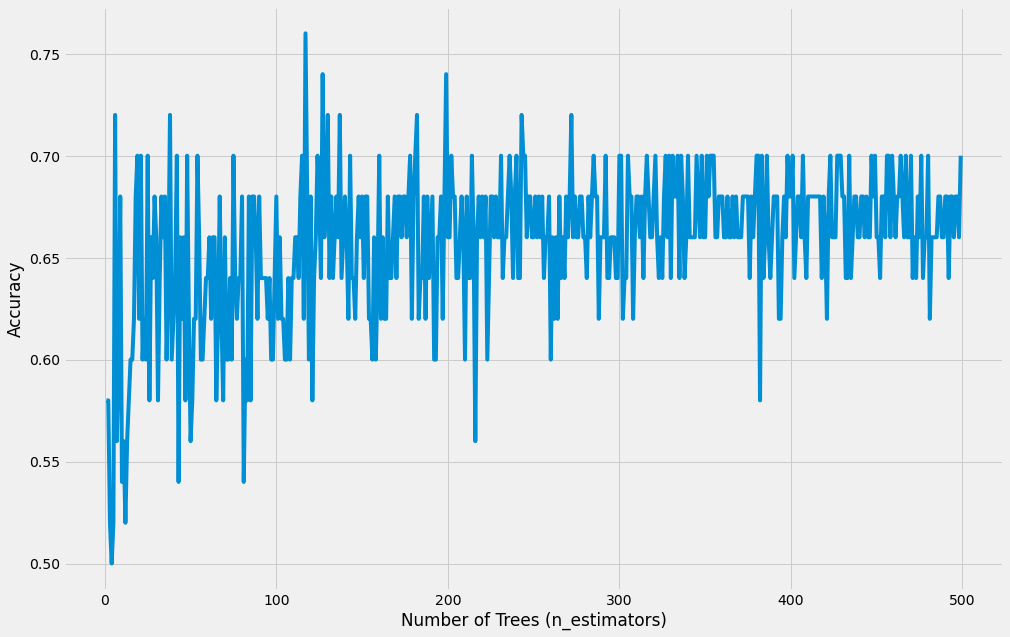

In [101]:
style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10))

#investigates the accuracy over a range of estimators plotting the result
#THIS TAKES A WHILE TO RUN!!
accuracy_data = []
nums = []
for i in range(1,500):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
#print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

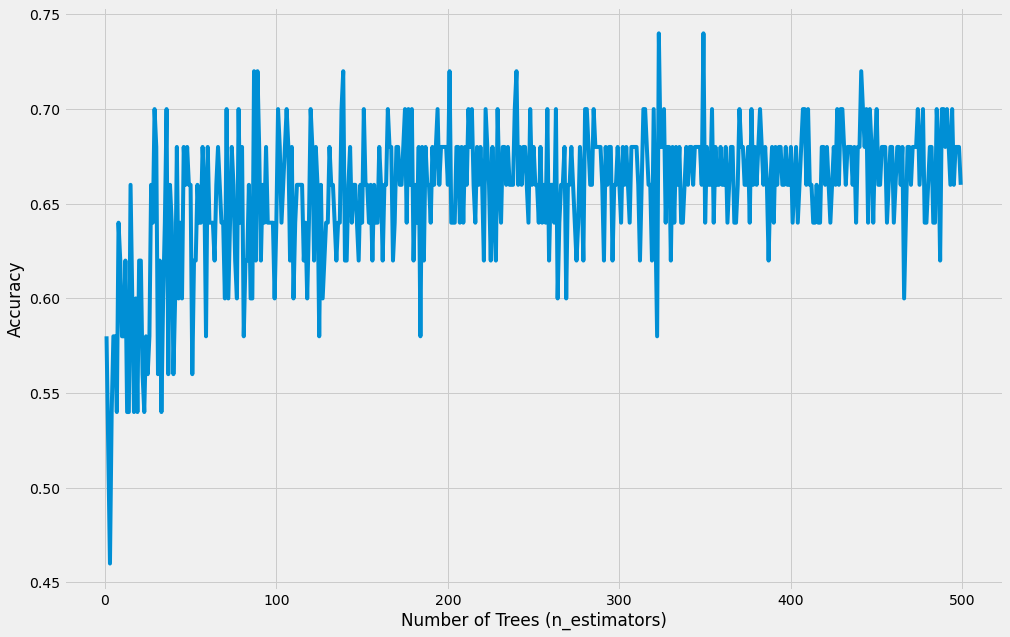

In [86]:

style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10))

#investigates the accuracy over a range of estimators plotting the result
#THIS TAKES A WHILE TO RUN!!
accuracy_data = []
nums = []
for i in range(1,500):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="gini")
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
#print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()